### What is the relationship between the size of the stores, number of employess and revenue?

c:\Users\ayah\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


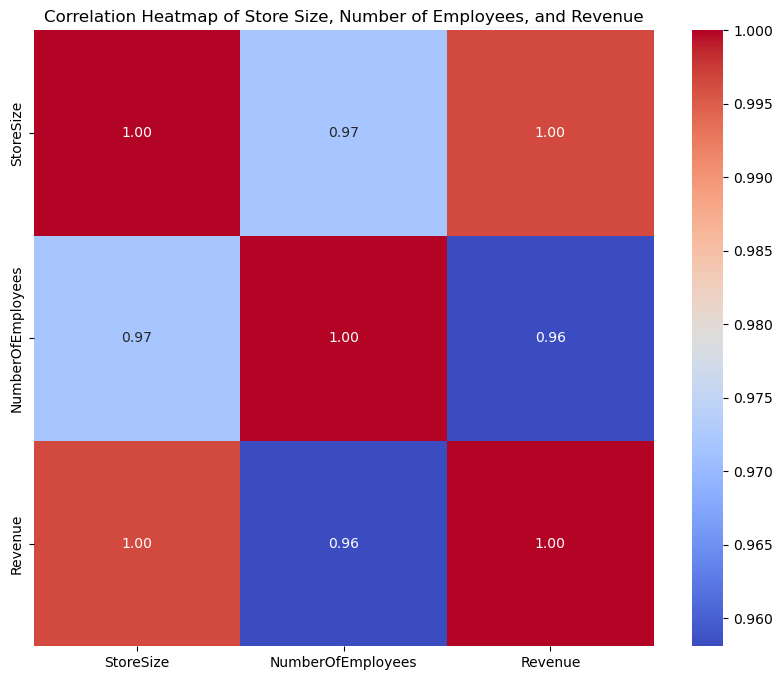

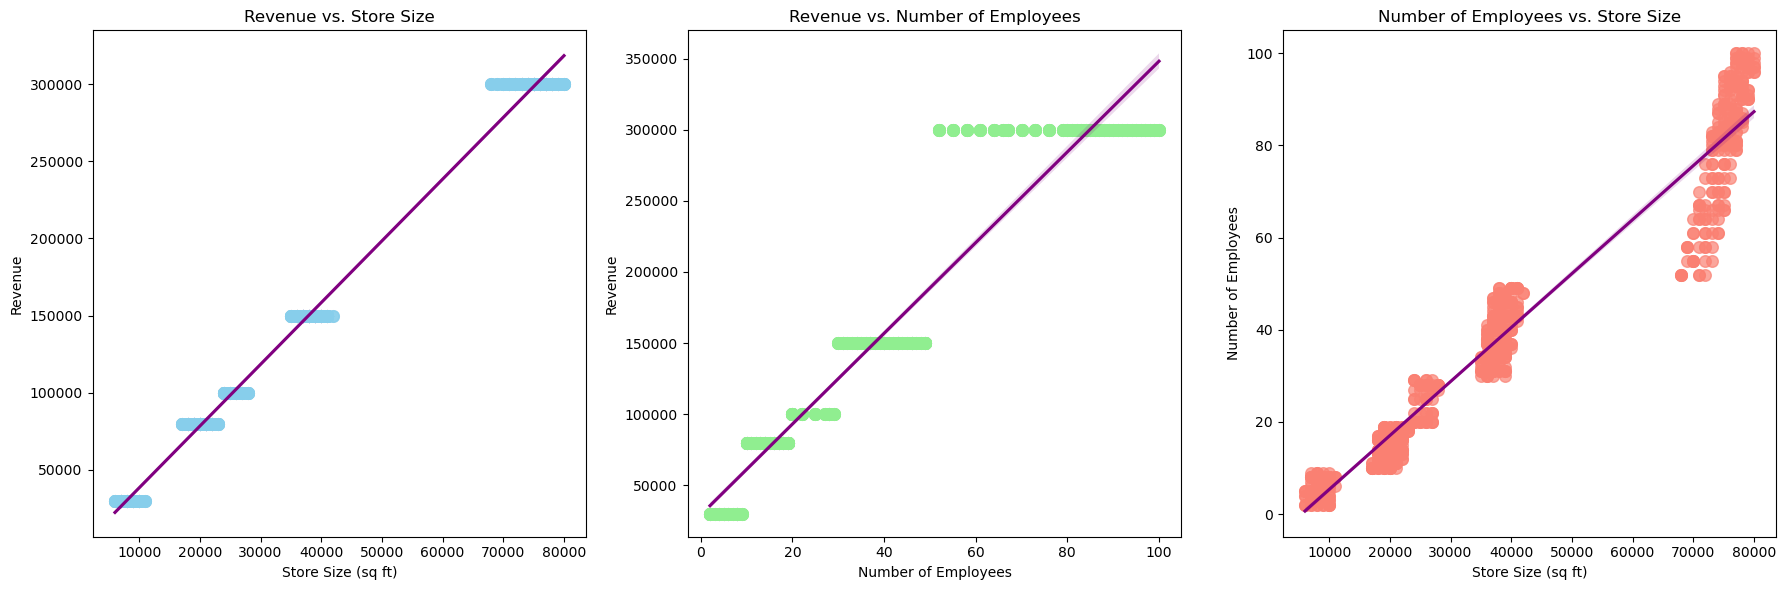

In [3]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

# Establish a database connection
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=********\SQLEXPRESS;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
)

# Define the SQL query
sql_query = """
SELECT
    SquareFeet AS StoreSize,
    NumberEmployees AS NumberOfEmployees,
    AnnualRevenue AS Revenue
FROM
    Sales.vStoreWithDemographics
"""

# Execute the SQL query and store the result in a pandas DataFrame
store_data = pd.read_sql(sql_query, conn)

# Close the database connection
conn.close()

# Calculate the correlation matrix
corr = store_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Store Size, Number of Employees, and Revenue')
plt.show()

# Plotting scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Store Size vs. Revenue
sns.regplot(x='StoreSize', y='Revenue', data=store_data, scatter_kws={'s': 70, 'alpha': 0.7, 'color': 'skyblue'}, line_kws={'color': 'purple', 'linestyle': '-'}, ax=axes[0])
axes[0].set_title('Revenue vs. Store Size')
axes[0].set_xlabel('Store Size (sq ft)')
axes[0].set_ylabel('Revenue')

# Number of Employees vs. Revenue
sns.regplot(x='NumberOfEmployees', y='Revenue', data=store_data, scatter_kws={'s': 70, 'alpha': 0.7, 'color': 'lightgreen'}, line_kws={'color': 'purple', 'linestyle': '-'}, ax=axes[1])
axes[1].set_title('Revenue vs. Number of Employees')
axes[1].set_xlabel('Number of Employees')
axes[1].set_ylabel('Revenue')

# Store Size vs. Number of Employees
sns.regplot(x='StoreSize', y='NumberOfEmployees', data=store_data, scatter_kws={'s': 70, 'alpha': 0.7, 'color': 'salmon'}, line_kws={'color': 'purple', 'linestyle': '-'}, ax=axes[2])
axes[2].set_title('Number of Employees vs. Store Size')
axes[2].set_xlabel('Store Size (sq ft)')
axes[2].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()
